In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import rich
print = rich.print
print("OpenCV version:", cv2.__version__)

OpenCV version: 4.8.0

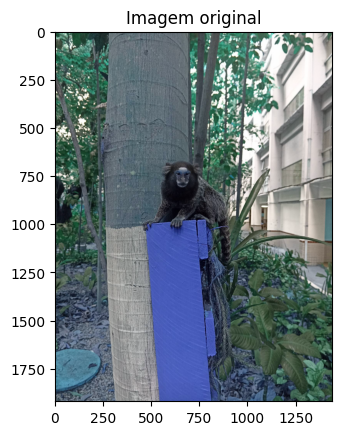

In [28]:
image = cv2.imread("./imgs/lolface.jpeg")

plt.imshow(image)
plt.title("Imagem original")
plt.show()

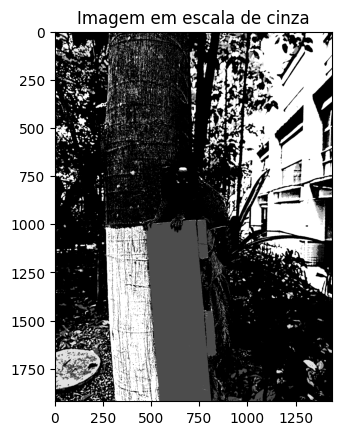

In [29]:
# Convert to B and W only img with a threshold of 127
bw = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)[1]
bw = cv2.cvtColor(bw, cv2.COLOR_BGR2GRAY)

plt.imshow(bw , cmap="gray")
plt.title("Imagem em escala de cinza")
plt.show()

In [30]:
def erosion(kernel: np.ndarray, bw: np.ndarray) -> np.ndarray:
    kernel = kernel * 255
    kernel_w = kernel.shape[0]
    kernel_h = kernel.shape[1]
    half_w = kernel_w // 2
    half_h = kernel_h // 2
    erosion = np.zeros(bw.shape, np.uint8)
    for x in range(half_w, bw.shape[0]-half_w):
        for y in range(half_h, bw.shape[1]-half_h):
            # only keep what matches the kernel
            img_slice = bw[x-half_w:x+half_w+1, y-half_h:y+half_h+1]
            if np.array_equal(img_slice, kernel):
                erosion[x,y] = 255
    return erosion

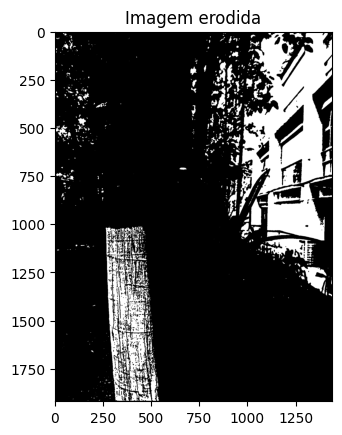

In [31]:
kernel = np.ones((3,3), np.uint8)
erosion_img = erosion(kernel, bw)
plt.imshow(erosion_img , cmap="gray")
plt.title("Imagem erodida")
plt.show()

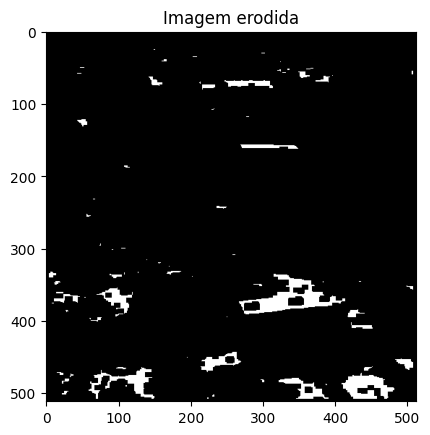

In [27]:
kernel = np.ones((7,9), np.uint8)
erosion_img = erosion(kernel, bw)
plt.imshow(erosion_img , cmap="gray")
plt.title("Imagem erodida")
plt.show()